In [1]:
import numpy as np
from scipy.stats import powerlaw
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
a0 = 0.65911332899
a1 = 0.99
mean0, var0, skew0, kurt0 = powerlaw.stats(a0, moments='mvsk')
mean1, var1, skew1, kurt1 = powerlaw.stats(a1, moments='mvsk')
print(mean0, var0, skew0, kurt0)
print(mean1, var1, skew1, kurt1)

0.3972684189037533 0.09004739272861799 0.3742420054268278 -1.1228043934069571
0.49748743718592964 0.08360992877194157 0.008711142072721003 -1.2023137944454259


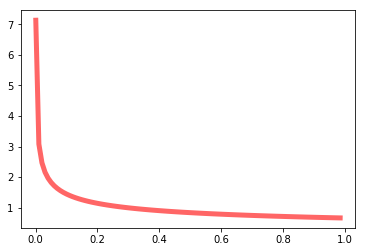

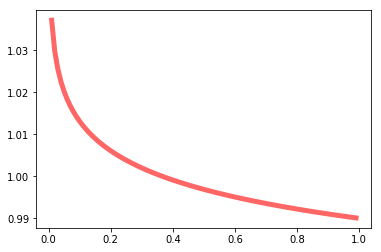

In [3]:
x = np.linspace(powerlaw.ppf(0.01, a0),powerlaw.ppf(0.99, a0), 100)
plt.plot(x, powerlaw.pdf(x, a0), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

x = np.linspace(powerlaw.ppf(0.01, a1),powerlaw.ppf(0.99, a1), 100)
plt.plot(x, powerlaw.pdf(x, a1), 'r-', lw=5, alpha=0.6, label='powerlaw pdf')
plt.show()

Hypothesis 0
Mean of Sum = 39.75635335175543, Sum/sqrt(K) = 3.9756353351755434
Variance of Sum = 8.83267195478984, Sum/sqrt(K) = 0.08832671954789843
Hypothesis 1
Mean of Sum = 49.711597068664034, Sum/sqrt(K) = 4.971159706866404
Variance of Sum = 8.41743368325032, Sum/sqrt(K) = 0.08417433683250315
Variance after devision: var0 = 1.0,  var1 = 1.0


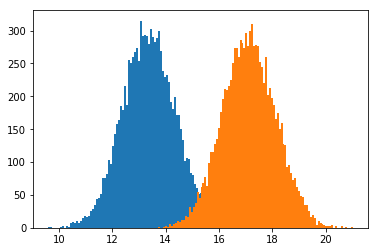

In [13]:
N = 10000                                   #training set
K = 100                                     #sum of K random variables

s0 = np.zeros(N)
s1 = np.zeros(N)

#w0 = np.zeros(N)
#w1 = np.zeros(N)

c0 = np.zeros(N)
c1 = np.zeros(N)
for i in range(N):
    s0[i] = np.sum(powerlaw.rvs(a0, size=K))               #Observation for hypothesis 0
    s1[i] = np.sum(powerlaw.rvs(a1, size=K))               #Observation hypothesis 1

#w0 = s0/K
#w1 = s1/K

c0 = s0/(np.sqrt(K))
c1 = s1/(np.sqrt(K))

e_mean0 = np.mean(c0) 
e_var0 = np.std(c0)**2

e_mean1 = np.mean(c1)
e_var1 = np.std(c1)**2
print("Hypothesis 0")
print("Mean of Sum = {}, Sum/sqrt(K) = {}".format(np.mean(s0), e_mean0))
print("Variance of Sum = {}, Sum/sqrt(K) = {}".format(np.std(s0)**2, e_var0))


print("Hypothesis 1")
print("Mean of Sum = {}, Sum/sqrt(K) = {}".format(np.mean(s1), e_mean1))
print("Variance of Sum = {}, Sum/sqrt(K) = {}".format(np.std(s1)**2, e_var1))

c0 = c0/np.sqrt(e_var0)
c1 = c1/np.sqrt(e_var1)

print("Variance after devision: var0 = {},  var1 = {}".format(np.std(c0)**2,np.std(c1)**2))

#plt.hist(s0, bins = 100)
#plt.hist(s1, bins = 100)
#plt.hist(w0, bins = 100)
#plt.hist(w1, bins = 100)
plt.hist(c0, bins = 100)
plt.hist(c1, bins = 100)
plt.show()

In [15]:
# Detection Assuming the Sum, Sum/K and Sum/sqrt(K) behave like gaussain

Threshold = (e_mean0 + e_mean1)/2
print("Threshold = ", Threshold)



Threshold =  4.47339752102
